# Data Modelling:

### 1. Load Train and Test dataset:

In [1]:
import pickle as pkl

with open("train.pkl", "rb") as f:
    X_train, y_train = pkl.load(f)

with open("test.pkl", "rb") as f:
    X_test, y_test = pkl.load(f)

### 2. Modelling the Train and Test Split:

#### 2.1. Training Different Classifiers for Classification:

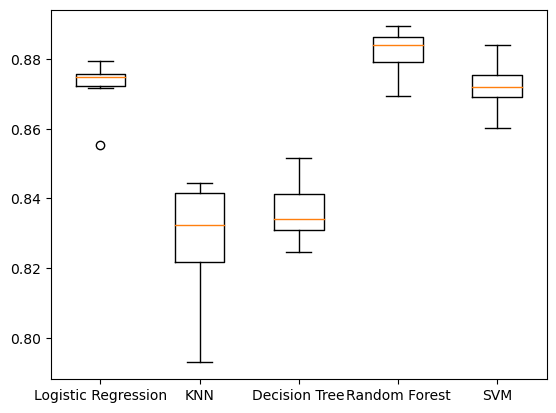

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

models = {"Logistic Regression": LogisticRegression(solver = 'newton-cg', max_iter = 500, C = 1000),
          "KNN": KNeighborsClassifier(),
          "Decision Tree": DecisionTreeClassifier(),
          "Random Forest": RandomForestClassifier(),
          "SVM": SVC(gamma='auto')
          }

results = []

for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf)
    results.append(cv_results)


plt.boxplot(results, labels= models.keys())
plt.show()



#### 2.2. Check the Performance Metrics:

In [3]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

for name, model in models.items():
    model.fit(X_train, y_train)
    test_score = model.score(X_test, y_test)
    prediction = model.predict(X_test)
    report = classification_report(prediction, y_test)
    mat = confusion_matrix(prediction, y_test)
    print("{} Test Set Accuracy: {}".format(name, test_score))
    print("{} Confusion Matrix:\n{}".format(name, mat))
    print("{} Classification Report:\n{}".format(name, report))

Logistic Regression Test Set Accuracy: 0.8848086586780054
Logistic Regression Confusion Matrix:
[[1150  154]
 [ 144 1139]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1304
           1       0.88      0.89      0.88      1283

    accuracy                           0.88      2587
   macro avg       0.88      0.88      0.88      2587
weighted avg       0.88      0.88      0.88      2587

KNN Test Set Accuracy: 0.8353304986470815
KNN Confusion Matrix:
[[ 995  127]
 [ 299 1166]]
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.89      0.82      1122
           1       0.90      0.80      0.85      1465

    accuracy                           0.84      2587
   macro avg       0.84      0.84      0.83      2587
weighted avg       0.84      0.84      0.84      2587

Decision Tree Test Set Accuracy: 0.8469269424043293
Decision T

#### 2.3. Plot the ROC and Precision-Recall Curve:

In [4]:
#from sklearn.metrics import RocCurveDisplay
#for model in models.values():
#    RocCurveDisplay.from_estimator(model, X_test, y_test)
#   plt.show()

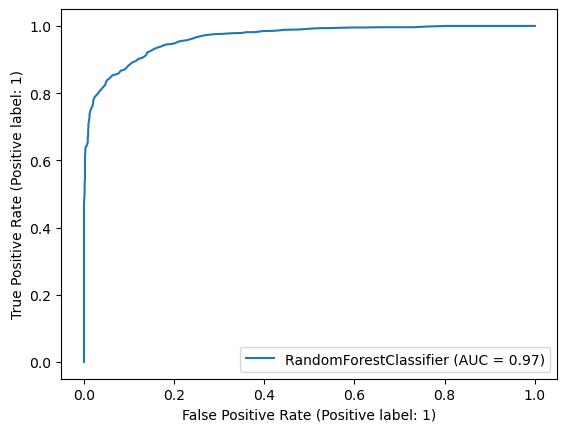

In [5]:
from sklearn.metrics import RocCurveDisplay

rf=RandomForestClassifier()
rf.fit(X_train, y_train)

RocCurveDisplay.from_estimator(rf, X_test, y_test)

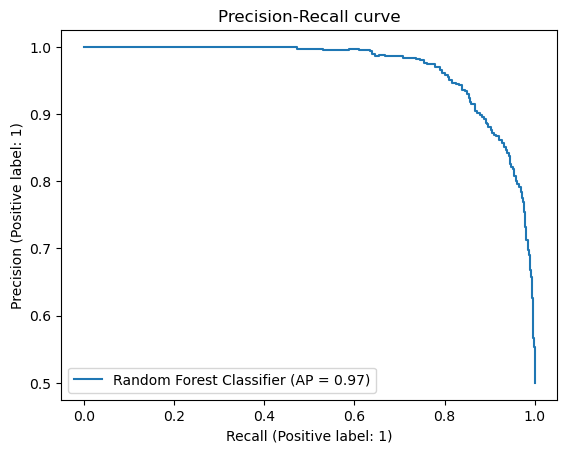

In [6]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    rf, X_test, y_test, name="Random Forest Classifier")
_ = display.ax_.set_title("Precision-Recall curve")

### **Consideration of the Performance Metrices:**

We know that, this dataset is an Imbalanced-class Classification problem. For this reson, we would emphasize on different performance metrices to compare the performances. 

* **Accuracy Score** - It calculates the overall accuracy of the model for training and test datasets. However, in unbalanced datasets, accuracy becomes a poorer metric.
* **Precision and Recall** Precision (correctness of a positive prediction) can be seen as a measure of quality, and Recall as a measure of quantity. 
* **F1 Score** The F1 score is the harmonic mean of precision and recall and thereby measures the percentage of correct predictions that a machine learning model has made. It is more suitable for imbalanced data.

For this binary-class dataset, our variable of interest is Customer Churn Status (i.e. 1 if the Customer Churned, 0 elsewise). In this context, the Precision and Recall indices can be explained as - 

$$ Precision = \frac{\text{True Positive}} {\text{True Positive + False Positive}}\
\\= \frac{\text{Customers who churned and was expected to churn}}{\text{Customers who churned and expected to churn + Customers didn't churned but were predicted to churn}} $$

Similarly, 

$$ Recall = \frac{\text{True Positive}} {\text{True Positive + False Negative}}\
\\= \frac{\text{Customers who churned and was expected to churn}}{\text{Customers who churned and expected to churn + Customers who churned but were predicted not to churn}} $$

For in terms of business policy planning and design, it's the management's call to decide on which performance metrices should be prioritize (Precision or Recall); in other words- which segment of customers should we target to churn. This will help to contribute towards developing effective customer retention policies for the company.

Observation:
1. The from the Boxplot, we observe that Random Forest Classifier most consistently as classifiers.
2. The Accuracy Score for Random Forest is 89.71% and F1 score is 90%.
3. From the ROC Curve for Random Forest above, we see that the AUC is 97%.

In terms of model performance and F1 score, we would consider Random Forest Classifer as our best performer classifier.

### 3. Finding Important Features:

In [7]:
with open("X.pkl", "rb") as f:
    X = pkl.load(f)

with open("y.pkl", "rb") as f:
    y = pkl.load(f)

Text(0.5, 1.0, 'Feature Importance')

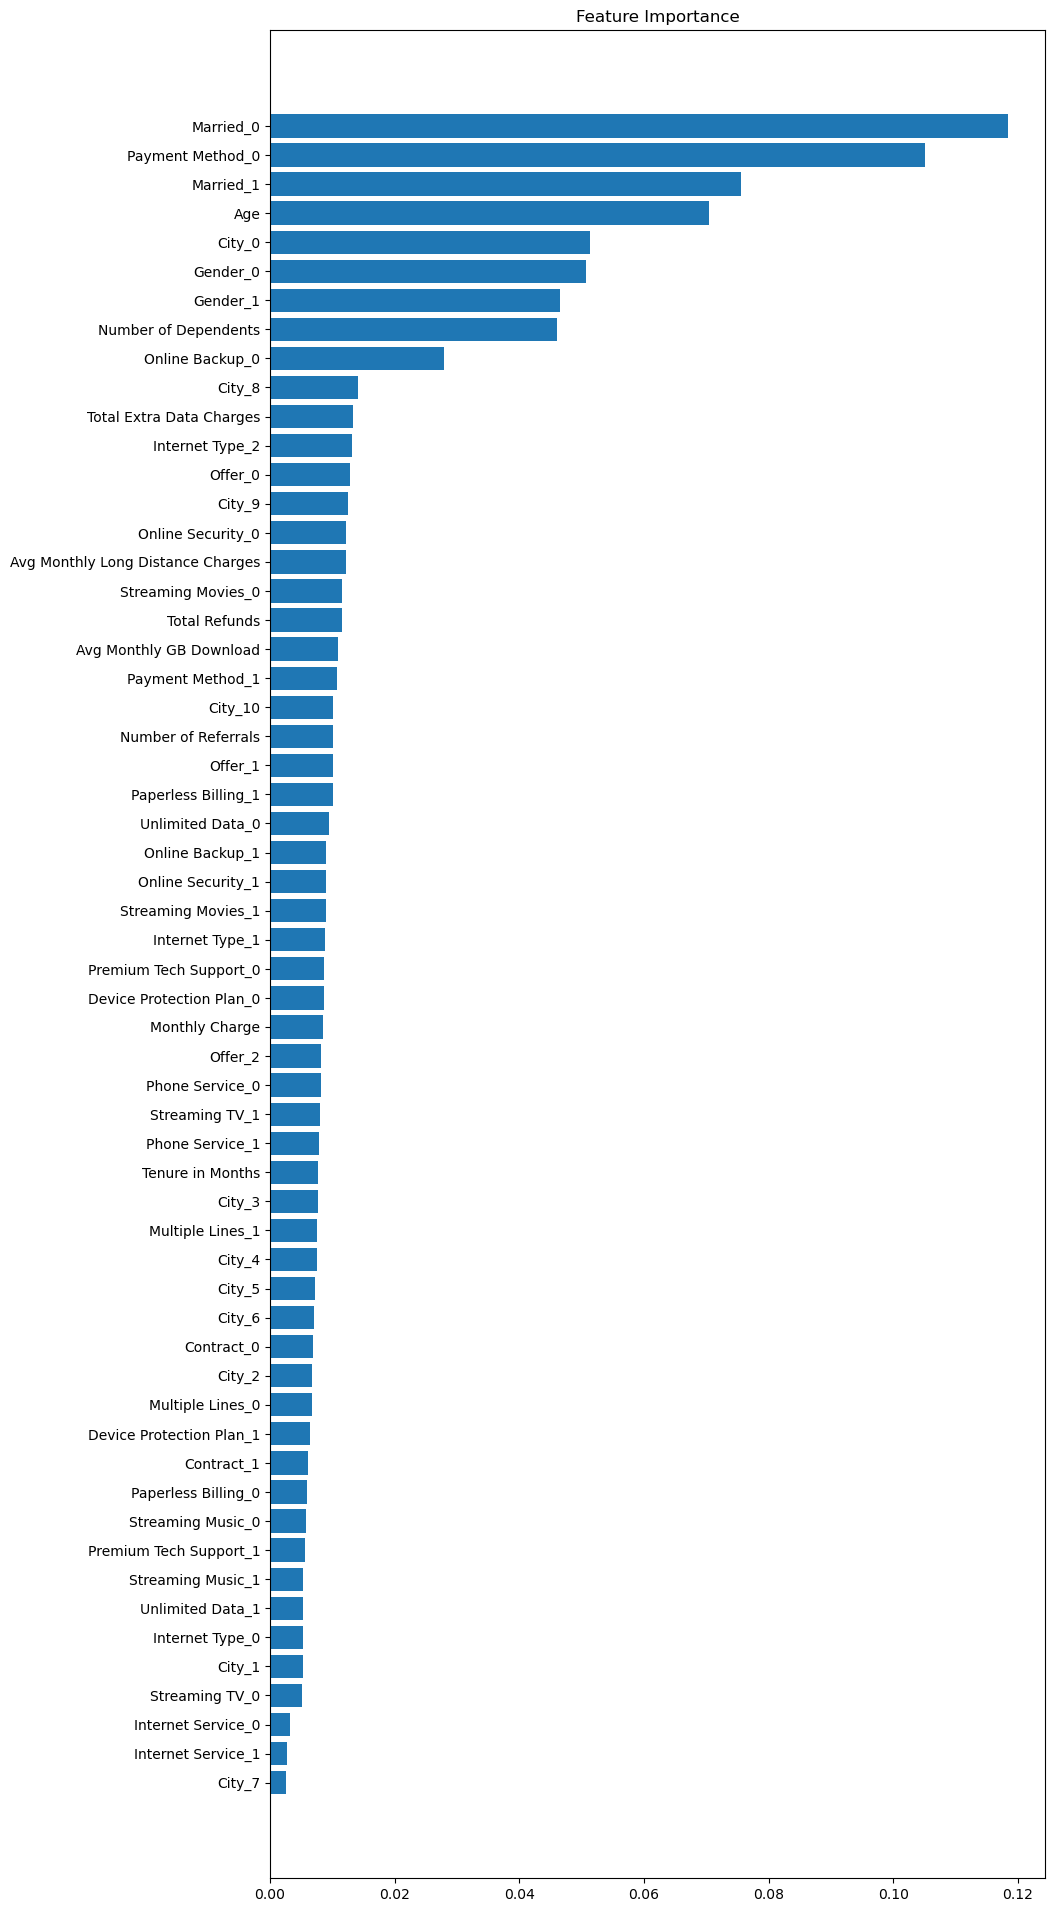

In [8]:

feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(10, 24))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('Feature Importance')


In [10]:
#import shap
#explainer = shap.TreeExplainer(rf)
#shap_values = explainer.shap_values(X_test)
#shap.summary_plot(shap_values, X_test, plot_type="bar")

In [16]:
#feat_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values()
#.nlargest(20).plot(kind='barh')

Observation:

From the Feature Importance graph for Random Forest Classifier, we observe that the top most important factors that contribute towards churn are-

* Marital Status
* Payment Method
* City
* Gender
* Number of Dependents 
etc.